# 1. 패키지 참조 및 데이터 가져오기

In [1]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np
import pandas as pd
from pandas import DataFrame
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset
from scipy.stats import zscore, pearsonr, spearmanr, probplot, shapiro, kstest, anderson

from statsmodels.formula.api import ols
from statsmodels.stats.api import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
my_dpi=200
font_path='./NotoSansKR-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop=fm.FontProperties(fname=font_path)
font_name=font_prop.get_name()
plt.rcParams['font.family']=font_name
plt.rcParams['font.size']=6
plt.rcParams['axes.unicode_minus']=False

In [3]:
origin=load_data('diamonds')
print('\n===== 데이터 크기 확인 =====')
print(f'데이터셋 크기 : {origin.shape}')
print(f'행 개수 : {origin.shape[0]}개')
print(f'열 개수 : {origin.shape[1]}개')
print('\n===== 타입 확인 =====')
print(origin.info())
origin.head()

[data] https://data.hossam.kr/data/kaggle/diamonds.xlsx
[desc] 다이아몬드를 커팅, 색상, 투명도, 가격 및 기타 속성 조사한 데이터 셋 (출처: https://www.kaggle.com/datasets/shivam2503/diamonds)

field    description
-------  -------------------------------------------------------------------
price    다이아몬드 가격 (USD, $326 ~ $18,823)
carat    중량 (0.2~5.01)
cut      컷 품질 (Fair, Good, Very Good, Premium, Ideal)
color    색상 등급 - J (worst) to D (best)
clarity  투명도 등급 (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
x        길이 mm (0~10.74)
y        너비 mm (0--58.9)
z        두께 mm (0--31.8)
depth    비율 정보 = z / mean(x, y) = 2 * z / (x + y) (43--79)
table    다이아몬드의 가장 넓은 지점에 비해 상단(테이블)의 너비 (43--95)


===== 데이터 크기 확인 =====
데이터셋 크기 : (53940, 10)
행 개수 : 53940개
열 개수 : 10개

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    53940 non-null  int64  
 1   carat    

,price,carat,cut,color,clarity,x,y,z,depth,table
0,326,0.23,Ideal,E,SI2,3.95,3.98,2.43,61.5,55.0
1,326,0.21,Premium,E,SI1,3.89,3.84,2.31,59.8,61.0
2,327,0.23,Good,E,VS1,4.05,4.07,2.31,56.9,65.0
3,334,0.29,Premium,I,VS2,4.20,4.23,2.63,62.4,58.0
4,335,0.31,Good,J,SI2,4.34,4.35,2.75,63.3,58.0


# 2. 전처리 작업

In [4]:
# 결측치 확인

origin.isna().sum()

price      0
carat      0
cut        0
color      0
clarity    0
x          0
y          0
z          0
depth      0
table      0
dtype: int64

> 값이 Nan인 결측치는 존재하지 않음

In [5]:
# 중복 데이터 확인

origin.duplicated().sum()

np.int64(146)

In [6]:
df=origin.drop_duplicates()

> 146개의 중복 행이 검사됨. 이를 제거 후 이어서 분석 진행.

In [7]:
# x, y, z 값이 0 이하인 데이터 비율 확인

print('x, y, z 값이 0 이하인 데이터 수 :',df[(df['x']<=0) | (df['y']<=0) | (df['z']<=0)]['price'].count())
print('x, y, z 값이 0 이하인 데이터 비율 :',(df[(df['x']<=0) | (df['y']<=0) | (df['z']<=0)]['price'].count())/len(df)*100)

x, y, z 값이 0 이하인 데이터 수 : 19
x, y, z 값이 0 이하인 데이터 비율 : 0.03531992415511024


In [8]:
df1=df.drop(index=df[(df['x']==0) | (df['y']==0) | (df['z']==0)].index)

> 다이아몬드의 크기를 결정하는 x, y, z가 0 이하인 데이터는 결측치로 판단

> 결측률이 5% 미만이기에 결측치를 제거 후 데이터 분석 진행

In [9]:
# 원본 데이터와 전처리 이후 데이터 수 비교

print('원본 데이터 수 :', len(origin))
print('전처리 이후 데이터 수 :', len(df1))
print('=== 데이터 %d건 삭제 ==='%(len(origin)-len(df1)))

원본 데이터 수 : 53940
전처리 이후 데이터 수 : 53775
=== 데이터 165건 삭제 ===


# 3. price와 carat 변수 분포 확인 및 로그 변환

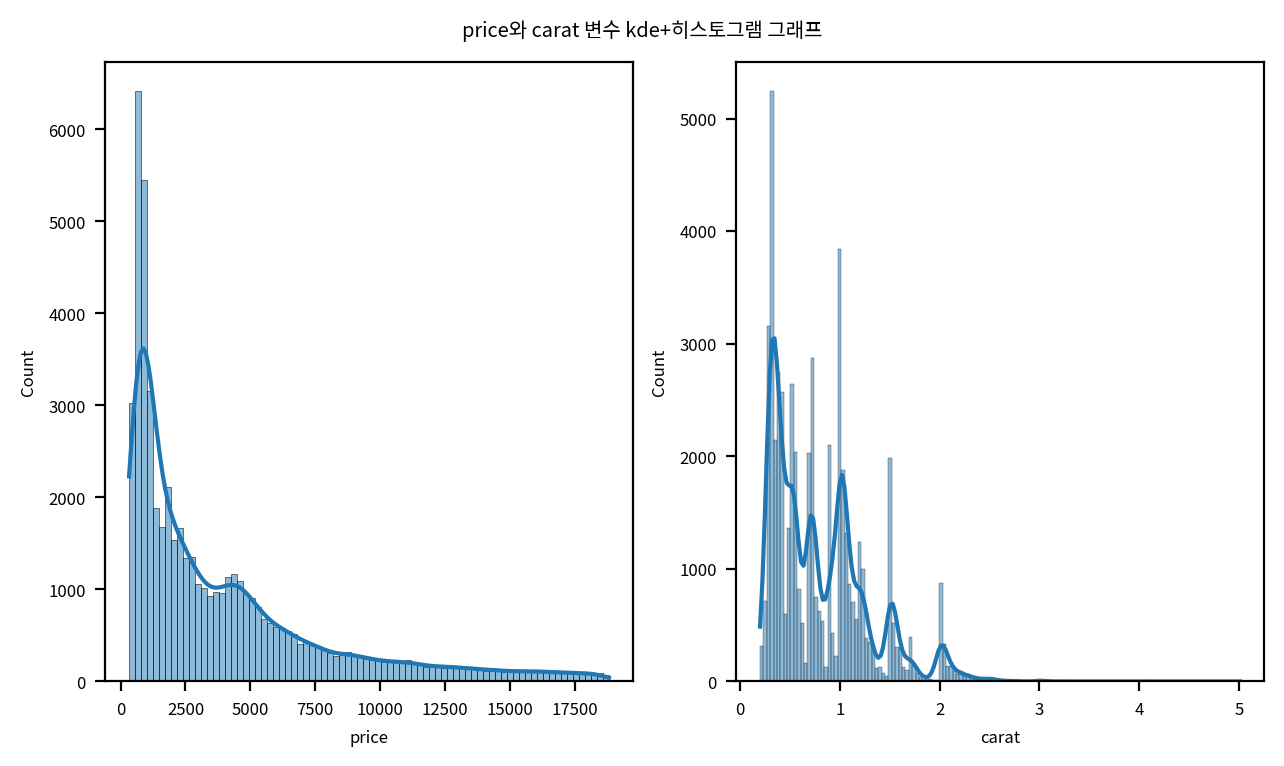

In [10]:
# 1. 그래프 초기화
width_px=1280
height_px=760
rows=1
cols=2
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.histplot(data=df1, x='price', fill=True, kde=True, ax=ax[0])
sb.histplot(data=df1, x='carat', fill=True, kde=True, ax=ax[1])
fig.suptitle('price와 carat 변수 kde+히스토그램 그래프')

# 3. 출력
plt.tight_layout()
plt.show()
plt.close()

price와 carat 변수 모두 분포가 좌편향되어 오른쪽으로 긴 꼬리를 가지고 있다.  
price 변수는 0과 2500 사이에 가장 많은 분포를 가지고 있으며, carat 변수는 0과 1 사이에 여러 개의 봉우리가 나타나고 있다.  
price와 carat 변수가 비슷한 양상을 보이는 것을 통해, carat이라는 변수가 price에 영향을 주고 있음을 알 수 있다.  

하지만 price와 carat 변수 모두 정규성과 거리가 멀고, 데이터가 편향된 모습을 보여주고 있다.  
따라서 이대로 회귀분석을 진행하기 보다는, 전처리를 통해 원하는 데이터의 모양으로 바꾸어주어야 한다.

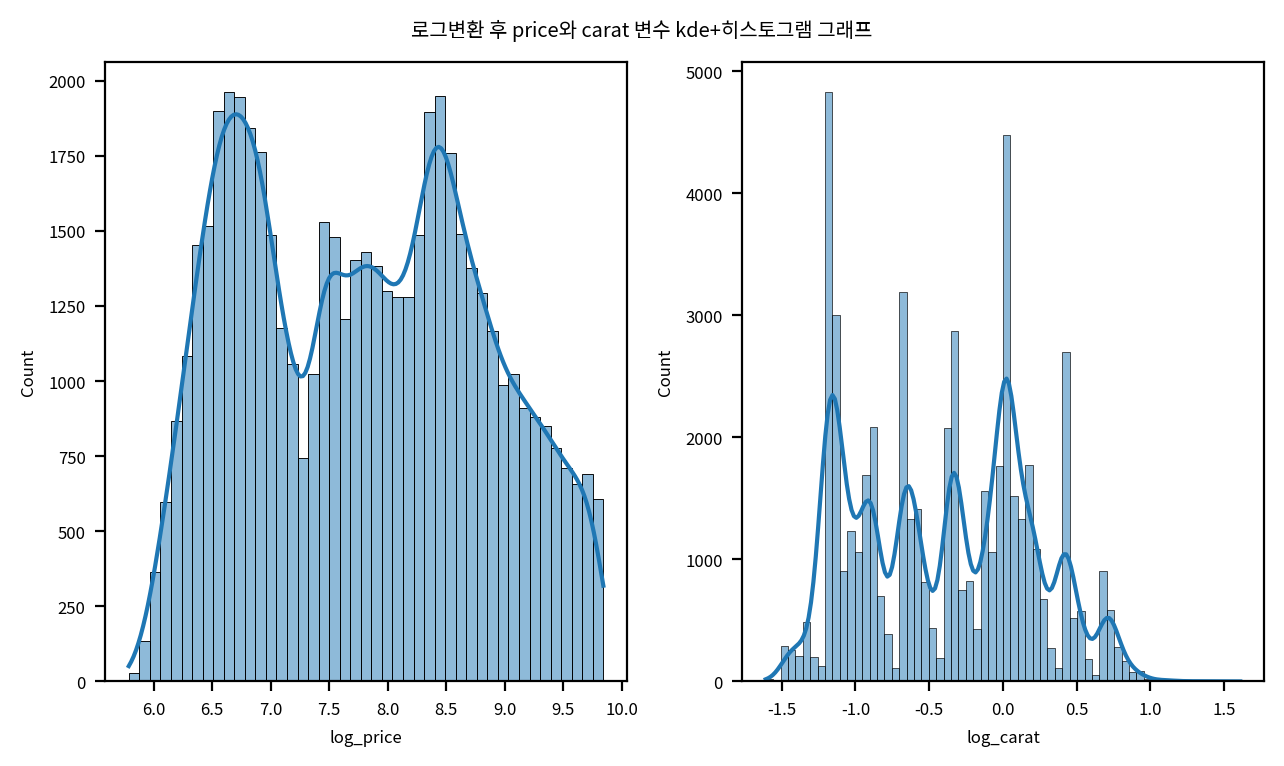

In [11]:
df1['log_price']=np.log(df1['price'])
df1['log_carat']=np.log(df1['carat'])

# 1. 그래프 초기화
width_px=1280
height_px=760
rows=1
cols=2
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.histplot(data=df1, x='log_price', fill=True, kde=True, ax=ax[0])
sb.histplot(data=df1, x='log_carat', fill=True, kde=True, ax=ax[1])
fig.suptitle('로그변환 후 price와 carat 변수 kde+히스토그램 그래프')

# 3. 출력
plt.tight_layout()
plt.show()
plt.close()

price와 carat을 각각 로그변환한 log_price와 log_carat의 분포를 보면, 로그변환하기 이전보다 분포가 중심에 더 가까워 졌음을 알 수 있다.  
기존의 데이터보다 중심에 더 가까운 분포를 보여주므로, 기존보다 정규성이 더 확보되었음을 알 수 있다.

# 4. 명목형 변수가 price에 주는 영향 확인

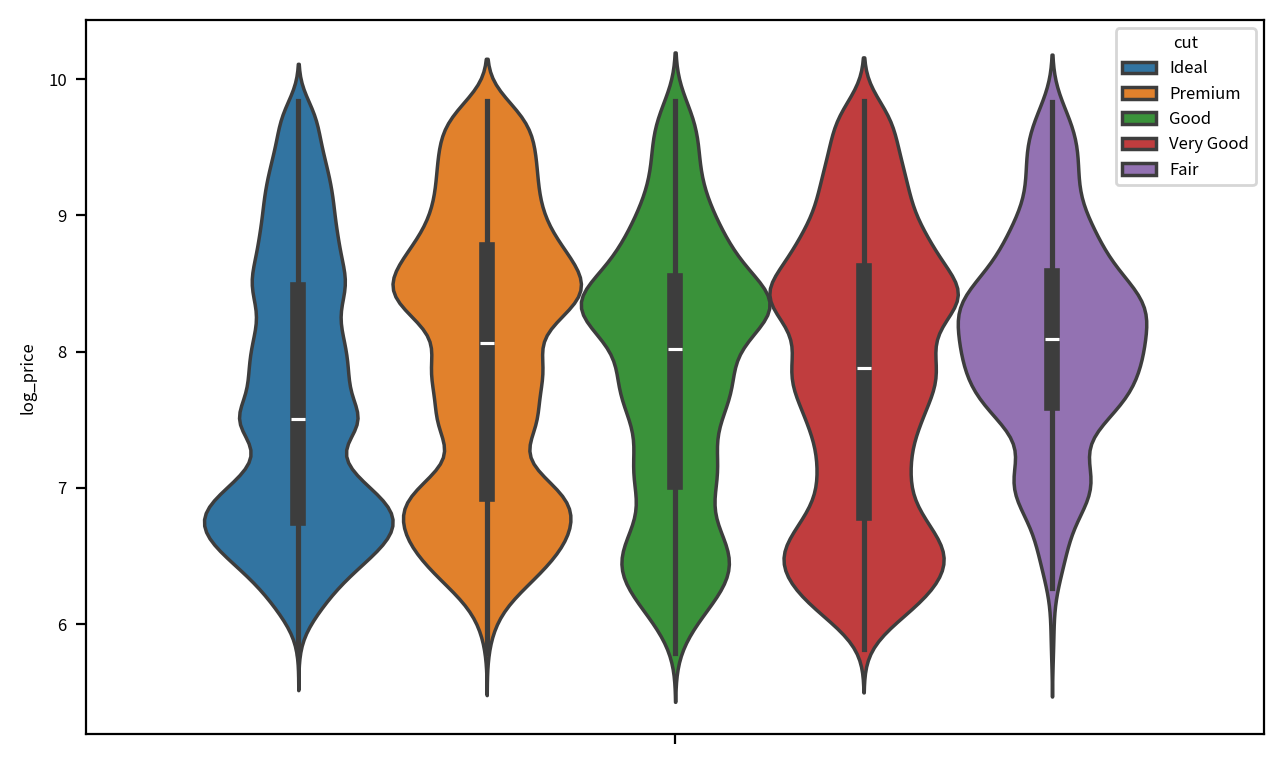

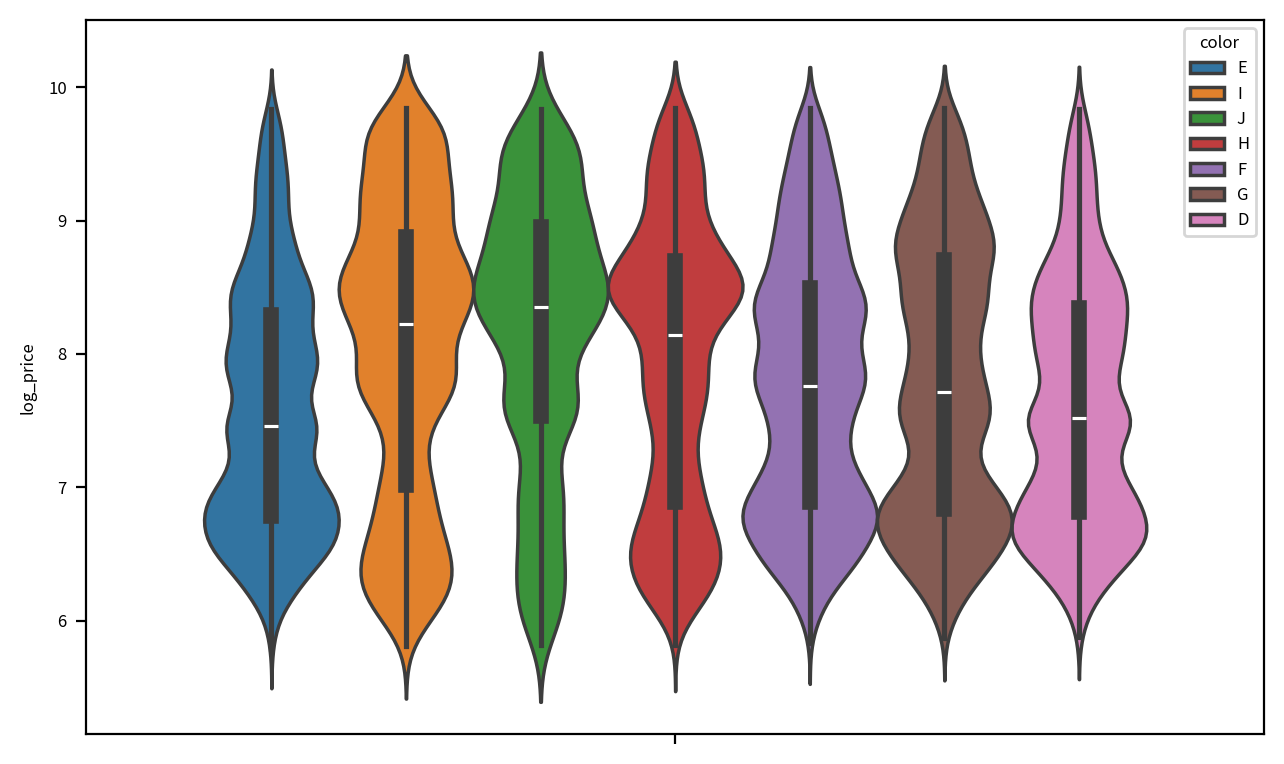

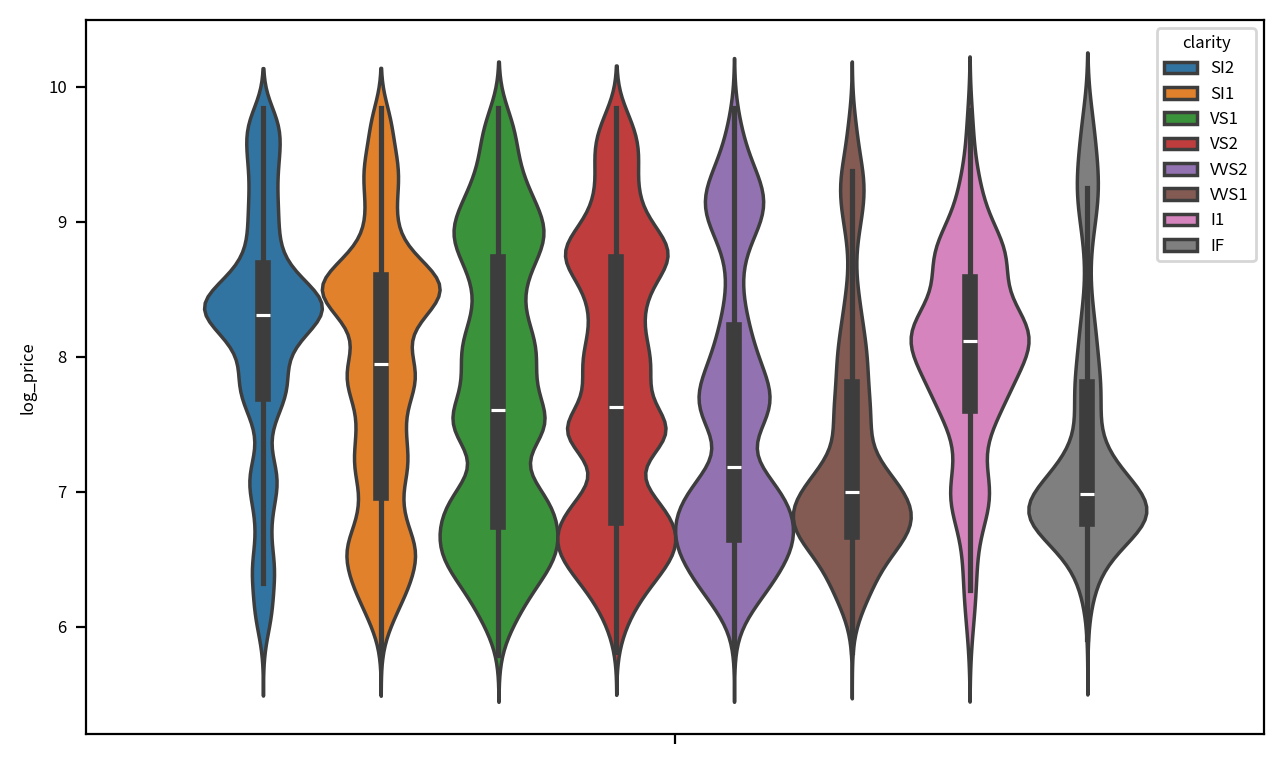

In [12]:
my_list=['cut', 'color', 'clarity']

for i in my_list:
    # 1. 그래프 초기화
    width_px=1280
    height_px=760
    rows=1
    cols=1
    figsize=(width_px/my_dpi, height_px/my_dpi)
    fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

    # 2. 그래프 그리기
    sb.violinplot(data=df1, y='log_price', hue=i)

    # 3. 출력
    plt.tight_layout()
    plt.show()
    plt.close()

명목형 변수들이 price에 주는 영향을 확인하기 위하여 바이올린 플롯을 사용하였다.  

cut 변수에서는 Ideal 등급이 다른 등급보다 낮은 중앙값 분포를 보여주고 있다.  
Good 등급은 중앙값보다 높은 가격에 데이터가 집중되어 있고, Ideal 등급은 중앙값보다 낮은 가격에 데이터가 집중되어 있다.  
또한 Fair 등급은 중앙값과 비슷한 가격에 데이터가 집중되어 있고, Premium과 Very Good 등급은 중앙값과 떨어진 가격대에 데이터가 집중되어 있다.  

color 변수에서는 I, J, H가 높은 price 중앙값을 보여주고 있고, 나머지 등급들은 상대적으로 낮은 price 중앙값을 보여주고 있다.  
또한 I, J, H color는 데이터가 중앙값보다 높은 가격에 데이터가 집중되어 있는 반면, 나머지 등급은 중앙값보다 낮은 가격에 데이터가 집중되어 있다.  

clarity 변수에서는 SI2, SI1, I1 clarity가 높은 price 중앙값을 보여주고 있고, 나머지 등급들은 상대적으로 낮은 price 중앙값을 보여주고 있다.  
특히 VVS1, IF clarity의 경우에는 다른 등급들에 비해 데이터가 낮은 가격대에 집중되어 있는 모습을 보여주고 있다.  

# 5. cut에 따른 price 일원분산분석

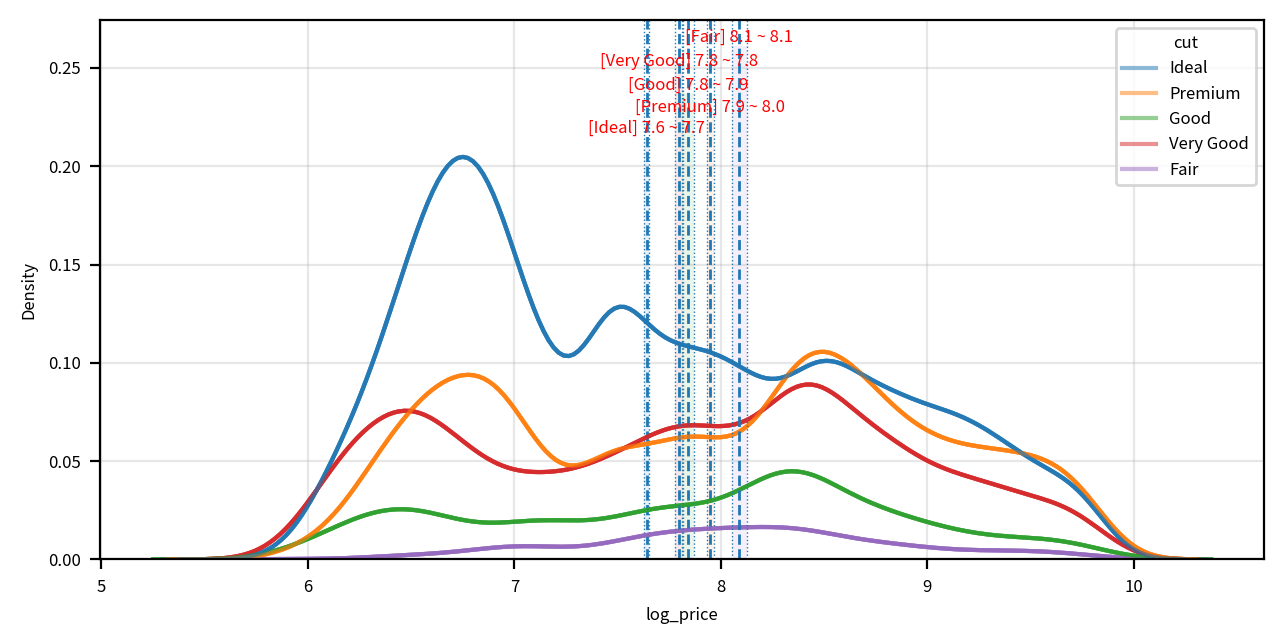

== 이 데이터는 정규성과 등분산성을 모두 만족하지 못한다. ==


,statistic,p-value,result
field,,,
Fair,5.325422,6.975886e-02,True
Good,707.152681,2.778090e-154,False
Ideal,4653.410445,0.000000e+00,False
Premium,9858.052388,0.000000e+00,False
Very Good,4677.135155,0.000000e+00,False
Levene,122.349875,3.939566e-104,False


,Source,ddof1,ddof2,F,p-unc,np2
0,cut,4,9493.334892,268.919636,2.605876e-219,0.017814


statistic: 268.920, p-value: 0.000, 대립가설 채택

=== Games-Howell ===


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Fair,Good,8.090289,7.840509,0.249780,0.023727,10.527108,3445.043360,0.000000e+00,0.267979
1,Fair,Ideal,8.090289,7.640958,0.449331,0.020303,22.131770,2018.137568,2.671197e-13,0.459203
2,Fair,Premium,8.090289,7.949959,0.140330,0.021060,6.663216,2327.464969,3.337676e-10,0.139562
3,Fair,Very Good,8.090289,7.798623,0.291666,0.021342,13.666427,2447.897947,5.975220e-13,0.289017
4,Good,Ideal,7.840509,7.640958,0.199551,0.015572,12.814638,7340.800370,0.000000e+00,0.201506
5,Good,Premium,7.840509,7.949959,-0.109450,0.016548,-6.614109,8984.457292,4.008447e-10,-0.107612
6,Good,Very Good,7.840509,7.798623,0.041886,0.016905,2.477781,9528.343382,9.574532e-02,0.041019
7,Ideal,Premium,7.640958,7.949959,-0.309001,0.011093,-27.856757,28475.738548,1.372913e-11,-0.306785
8,Ideal,Very Good,7.640958,7.798623,-0.157665,0.011618,-13.570723,24093.884656,0.000000e+00,-0.156290
9,Premium,Very Good,7.949959,7.798623,0.151337,0.012897,11.734559,25329.519422,0.000000e+00,0.146468


Fair와(과) Good은(는) pval 값이 0.05보다 작으므로 유의미한 차이가 존재한다.
Fair와(과) Ideal은(는) pval 값이 0.05보다 작으므로 유의미한 차이가 존재한다.
Fair와(과) Premium은(는) pval 값이 0.05보다 작으므로 유의미한 차이가 존재한다.
Fair와(과) Very Good은(는) pval 값이 0.05보다 작으므로 유의미한 차이가 존재한다.
Good와(과) Ideal은(는) pval 값이 0.05보다 작으므로 유의미한 차이가 존재한다.
Good와(과) Premium은(는) pval 값이 0.05보다 작으므로 유의미한 차이가 존재한다.
Good와(과) Very Good은(는) pval 값이 0.05보다 크므로 유의미한 차이가 존재하지 않는다.
Ideal와(과) Premium은(는) pval 값이 0.05보다 작으므로 유의미한 차이가 존재한다.
Ideal와(과) Very Good은(는) pval 값이 0.05보다 작으므로 유의미한 차이가 존재한다.
Premium와(과) Very Good은(는) pval 값이 0.05보다 작으므로 유의미한 차이가 존재한다.


In [13]:
# 확인할 데이터
field='log_price'
hue_field='cut'
hue_values=df1[hue_field].unique()
# hue_count=len(hue_values)

width_px=1280
height_px=640
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

for i, v in enumerate(hue_values):
    temp=df1[df1[hue_field]==v]
    sb.kdeplot(data=df1, x=field, hue=hue_field, fill=False, alpha=0.5)
    ax.grid(True, alpha=0.3)
    # ax.set_title(v, fontsize=10, pad=3)
    
    # 신뢰구간
    max=temp[field].max()
    clevel=0.95
    dof=len(temp[field])-1
    sp_mean=temp[field].mean()
    sp_std=temp[field].std(ddof=1)
    sp_std_error=sp_std/sqrt(len(temp[field]))
    cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

    ax.axvline(cmin, linestyle=':', linewidth=0.5)
    ax.axvline(cmax, linestyle=':', linewidth=0.5)
    
    # 평균 표시
    ymin, ymax=ax.get_ylim()
    ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)
    ax.axvline(sp_mean, linestyle='--', linewidth=1)

    # 텍스트 그리기
    ax.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s='[%s] %0.1f ~ %0.1f'%(v, cmin, cmax),
            horizontalalignment='center',
            verticalalignment='bottom',
            fontdict={'size':6, 'color':'red'})

plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

groups=[(name, grp[field]) for name, grp in df1.groupby(hue_field)]

equal_var_fields=[]
normal_dist=True
report=[]

for name, series in groups:
    s, p=normaltest(series)

    normalize=(p>0.05)
    report.append({
        'field':name,
        'statistic':s,
        'p-value':p,
        'result':normalize
    })
    normal_dist=normal_dist and normalize

if normal_dist:
    n='Bartlett'
    s, p=bartlett(*[s.values for _, s in groups])
    homos=(p>0.05)
    if homos:
        print('== 이 데이터는 정규성과 등분산성을 모두 만족한다. ==')
    else:
        print('== 이 데이터는 정규성은 만족하지만, 등분산성을 만족하지 못한다 ==')
else:
    n='Levene'
    s, p=levene(*[s.values for _, s in groups], center='median')
    homos=(p>0.05)
    if homos:
        print('== 이 데이터는 정규성은 만족하지 못하지만, 등분산성은 만족한다. ==')
    else:
        print('== 이 데이터는 정규성과 등분산성을 모두 만족하지 못한다. ==')

equal_var=p>0.05
report.append({
    'field':n,
    'statistic':s,
    'p-value':p,
    'result':equal_var
})

report_df=DataFrame(report).set_index('field')
display(report_df)

anova_df=df1[[field, hue_field]].copy()

if equal_var:
    pg_anova=anova(data=anova_df, dv=field, between=hue_field)
else:
    pg_anova=welch_anova(data=anova_df, dv=field, between=hue_field)

f_val=pg_anova['F'].iloc[0]
p_val=pg_anova['p-unc'].iloc[0]
if equal_var:
    pg_anova=anova(data=anova_df, dv=field, between=hue_field)
else:
    pg_anova=welch_anova(data=anova_df, dv=field, between=hue_field)
display(pg_anova)
print('statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(f_val, p_val, '대립' if p_val<=0.05 else '귀무'))

if equal_var:
    print('\n=== Tukey HSD ===')
    hoc_df=pairwise_tukey(data=anova_df, dv=field, between=hue_field)
    display(hoc_df)
    for i in range(0, len(hoc_df)):
        if hoc_df['pval'][i]<0.05:
            print('%s와(과) %s은(는) p-tukey 값이 0.05보다 작으므로 유의미한 차이가 존재한다.'%(hoc_df['A'][i], hoc_df['B'][i]))
        else:
            print('%s와(과) %s은(는) p-tukey 값이 0.05보다 크므로 유의미한 차이가 존재하지 않는다.'%(hoc_df['A'][i], hoc_df['B'][i]))
else:
    print('\n=== Games-Howell ===')
    hoc_df=pairwise_gameshowell(data=anova_df, dv=field, between=hue_field)
    display(hoc_df)
    for i in range(0, len(hoc_df)):
        if hoc_df['pval'][i]<0.05:
            print('%s와(과) %s은(는) pval 값이 0.05보다 작으므로 유의미한 차이가 존재한다.'%(hoc_df['A'][i], hoc_df['B'][i]))
        else:
            print('%s와(과) %s은(는) pval 값이 0.05보다 크므로 유의미한 차이가 존재하지 않는다.'%(hoc_df['A'][i], hoc_df['B'][i]))

Cut 변수는 정규성을 만족하지 못하기 때문에, Levene 검정을 통해 cut이라는 변수가 정말 log_price에 영향을 주는 지 검정을 실시하였다.  
이 때 p-value<0.05 이므로, 95% 신뢰구간 안에서 대립가설을 채택하여 cut 변수가 log_price에 영향을 준다는 것을 알 수 있다.  

여기서 cut 변수가 등분산성을 만족하지 못하므로, cut 변수의 등급들을 Games-Howell을 통해 일원분산분석을 진행하였다.  

여기에서 예시로 Ideal 등급과 Premium 등급을 비교해보았다.  
이 때에 Ideal 등급과 Premium 등급은 p-value<0.05 이므로, 유의미한 차이가 존재한다.  
Ideal 등급은 평균적으로 7.64의 log_price를 보여주고, Premium 등급은 평균적으로 7.95의 log_price를 보여준다.  
이는 Ideal 등급과 Premium 등급이 평균적으로 0.31만큼의 차이를 보여주고 있음을 시사한다.  

위 분석을 이용해 간단히 등급별로 log_price의 순위를 매겨보면 아래와 같다.

> Fair > Premium > Good >= Very Good > Ideal

(Good과 Very Good에는 유의미한 차이가 존재하지 않음)

# 6. 명목형 변수에 따른 price 이원분산분석

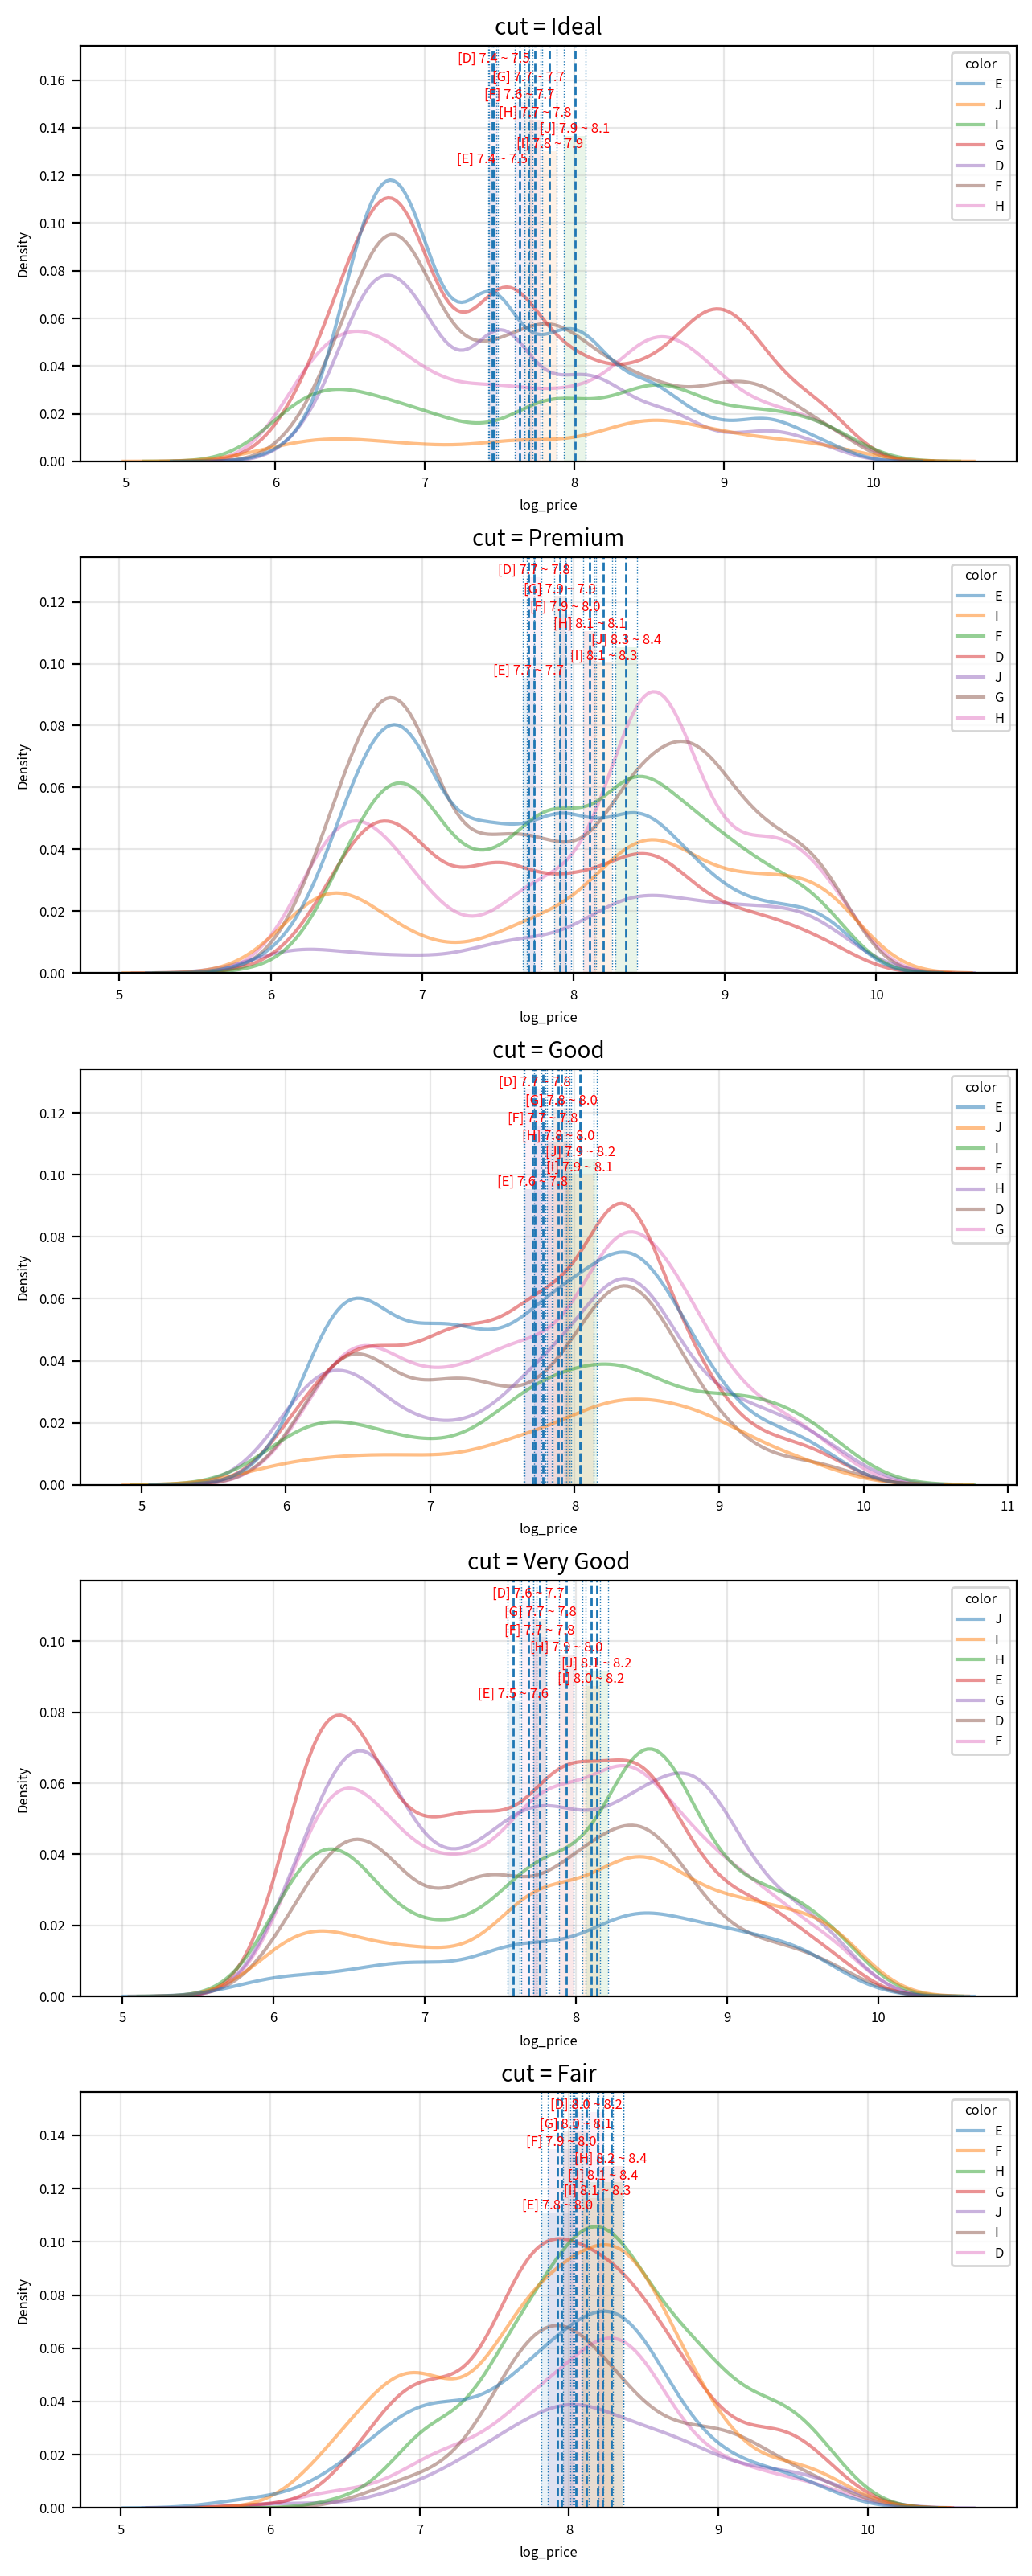

== 이 데이터는 정규성과 등분산성을 모두 만족하지 못한다. ==


,statistic,p-value,result
field,,,
"Ideal, E",308.571096,9.877292e-68,False
"Ideal, I",2764.050631,0.000000e+00,False
"Ideal, J",255.253793,3.735452e-56,False
"Ideal, H",4362.667241,0.000000e+00,False
"Ideal, F",529.434863,1.083129e-115,False
"Ideal, G",2468.268467,0.000000e+00,False
"Ideal, D",211.390017,1.250953e-46,False
"Premium, E",357.297112,2.593689e-78,False
"Premium, I",311.285498,2.542219e-68,False


,Source,SS,DF,MS,F,p-unc,np2
0,cut,882.570850,4.0,220.642712,224.008090,4.768926e-191,0.016400
1,color,1312.829796,6.0,218.804966,222.142313,2.703293e-281,0.024202
2,cut * color,94.129853,24.0,3.922077,3.981899,1.739256e-10,0.001775
3,Residual,52932.639061,53740.0,0.984977,NaN,NaN,NaN


-> cut 효과는 유의함. (대립가설 채택 : p <= 0.05)
-> color 효과는 유의함. (대립가설 채택 : p <= 0.05)
-> cut * color 효과는 유의함. (대립가설 채택 : p <= 0.05)
-> Residual 효과는 유의하지 않음. (귀무가설 채택 : p > 0.05)

[cut]
- 주효과 유의함 (p=4.77e-191) -> 사후검정 수행

=== Games-Howell ===


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Fair,Good,8.090289,7.840509,0.249780,0.023727,10.527108,3445.043360,0.000000e+00,0.267979
1,Fair,Ideal,8.090289,7.640958,0.449331,0.020303,22.131770,2018.137568,2.671197e-13,0.459203
2,Fair,Premium,8.090289,7.949959,0.140330,0.021060,6.663216,2327.464969,3.337676e-10,0.139562
3,Fair,Very Good,8.090289,7.798623,0.291666,0.021342,13.666427,2447.897947,5.975220e-13,0.289017
4,Good,Ideal,7.840509,7.640958,0.199551,0.015572,12.814638,7340.800370,0.000000e+00,0.201506
5,Good,Premium,7.840509,7.949959,-0.109450,0.016548,-6.614109,8984.457292,4.008447e-10,-0.107612
6,Good,Very Good,7.840509,7.798623,0.041886,0.016905,2.477781,9528.343382,9.574532e-02,0.041019
7,Ideal,Premium,7.640958,7.949959,-0.309001,0.011093,-27.856757,28475.738548,1.372913e-11,-0.306785
8,Ideal,Very Good,7.640958,7.798623,-0.157665,0.011618,-13.570723,24093.884656,0.000000e+00,-0.156290
9,Premium,Very Good,7.949959,7.798623,0.151337,0.012897,11.734559,25329.519422,0.000000e+00,0.146468



[color]
- 주효과 유의함 (p=2.7e-281) -> 사후검정 수행

=== Games-Howell ===


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,D,E,7.618173,7.580117,0.038056,0.014652,2.597212,14515.582383,1.267697e-01,0.041096
1,D,F,7.618173,7.762781,-0.144609,0.015014,-9.631319,14916.864602,0.000000e+00,-0.152092
2,D,G,7.618173,7.789751,-0.171579,0.014861,-11.545292,15379.789166,9.355738e-12,-0.173158
3,D,H,7.618173,7.917375,-0.299202,0.016231,-18.434102,14954.249959,8.481327e-12,-0.298239
4,D,I,7.618173,8.020211,-0.402038,0.018794,-21.391367,10523.292778,0.000000e+00,-0.398023
5,D,J,7.618173,8.147775,-0.529603,0.022595,-23.439374,4747.645070,1.590950e-12,-0.551687
6,E,F,7.580117,7.762781,-0.182664,0.013642,-13.390158,19193.887347,3.519407e-14,-0.192929
7,E,G,7.580117,7.789751,-0.209634,0.013473,-15.559550,21000.149239,4.794498e-12,-0.213547
8,E,H,7.580117,7.917375,-0.337258,0.014970,-22.528700,16529.605620,1.646128e-12,-0.340476
9,E,I,7.580117,8.020211,-0.440094,0.017717,-24.840170,9608.691599,2.010170e-12,-0.442875



[cut * color] 상호작용 효과
- 상호작용 유의함 (p=1.74e-10) -> 단순주효과 분석 필요


In [14]:
# 확인할 데이터
field='log_price'
group_field='cut'
hue_field='color'

# 데이터 정리
df2=df1[[field, group_field, hue_field]]
group_values=df2[group_field].unique()
group_count=len(group_values)
hue_values=df2[hue_field].unique()

# 그래프 초기화
rows=group_count
cols=1
width_px=1280*cols
height_px=640*rows
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 그래프 그리기
for i, v in enumerate(group_values):
    temp=df2[df2[group_field]==v]
    
    sb.kdeplot(data=temp, x=field, hue=hue_field, fill=False, alpha=0.5, ax=ax[i])
    ax[i].grid(True, alpha=0.3)
    ax[i].set_title('{0} = {1}'.format(group_field, v), fontsize=10, pad=5)

    for h in hue_values:
        temp_sub=temp[temp[hue_field]==h]

        max=temp_sub[field].max()
        clevel=0.95
        dof=len(temp_sub[field])-1
        sp_mean=temp_sub[field].mean()
        sp_std=temp_sub[field].std(ddof=1)
        sp_std_error=sp_std/sqrt(len(temp_sub[field]))
        cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

        ax[i].axvline(cmin, linestyle=':', linewidth=0.5)
        ax[i].axvline(cmax, linestyle=':', linewidth=0.5)
        
        # 평균 표시
        ymin, ymax=ax[i].get_ylim()
        ax[i].fill_between([cmin, cmax], 0, ymax, alpha=0.1)
        ax[i].axvline(sp_mean, linestyle='--', linewidth=1)

        # 텍스트 그리기
        ax[i].text(x=(cmax-cmin)/2+cmin,
                y=ymax,
                s='[%s] %0.1f ~ %0.1f'%(h, cmin, cmax),
                horizontalalignment='center',
                verticalalignment='bottom',
                fontdict={'size':6, 'color':'red'})

plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

# 분산 분석의 가정 확인
groups=[(name, grp[field]) for name, grp in df2.groupby(hue_field)]

equal_var_fields=[]
normal_dist=True
report=[]

for i in group_values:
    for j in hue_values:
        filtered_data=df2[(df2[group_field]==i)&(df2[hue_field]==j)][field]
        equal_var_fields.append(filtered_data)

        s, p=normaltest(filtered_data)
        normalize=(p>0.05)
        report.append({
            'field':'{0}, {1}'.format(i,j),
            'statistic':s,
            'p-value':p,
            'result':normalize
        })
        normal_dist=normal_dist and normalize

if normal_dist:
    n='Bartlett'
    s, p=bartlett(*equal_var_fields)
    homos=(p>0.05)
    if homos:
        print('== 이 데이터는 정규성과 등분산성을 모두 만족한다. ==')
    else:
        print('== 이 데이터는 정규성은 만족하지만, 등분산성을 만족하지 못한다 ==')
else:
    n='Levene'
    s, p=levene(*equal_var_fields, center='median')
    homos=(p>0.05)
    if homos:
        print('== 이 데이터는 정규성은 만족하지 못하지만, 등분산성은 만족한다. ==')
    else:
        print('== 이 데이터는 정규성과 등분산성을 모두 만족하지 못한다. ==')

equal_var=p>0.05
report.append({
    'field':n,
    'statistic':s,
    'p-value':p,
    'result':equal_var
})

report_df=DataFrame(report).set_index('field')
display(report_df)

# # 이원 분산 분석
# if equal_var:
pg_anova=anova(data=df2, dv=field, between=[group_field, hue_field])
# else:
#     pg_anova=welch_anova(data=df2, dv=field, between=[group_field, hue_field])
display(pg_anova)

for idx in pg_anova.index:
    row=pg_anova.iloc[idx]
    source=row['Source']
    p_val=row['p-unc']

    if p_val<=0.05:
        print(f'-> {source} 효과는 유의함. (대립가설 채택 : p <= 0.05)')
    else:
        print(f'-> {source} 효과는 유의하지 않음. (귀무가설 채택 : p > 0.05)')

# 사후 검정
xname=[group_field, hue_field]
levels={}

for factor in xname:
    level_count=df2[factor].nunique()
    levels[factor]=level_count

pvals={}

for index, row in pg_anova.iterrows():
    source_name=row['Source']
    p_value=row['p-unc']
    pvals[source_name]=p_value
for factor in xname:
    print(f'\n[{factor}]')
    if levels[factor]<=2:
        print(f'- {levels[factor]}수준 요인이므로 사후검정이 필요 없습니다.')
        continue
    p_val=pvals.get(factor, None)
    if p_val is None:
        print('- ANOVA 결과에서 해당 요인을 찾을 수 없습니다.')
        continue
    if p_val > 0.05:
        print(f'- 주효과 유의하지 않음 (p={p_val:.3g}) -> 사후검정 수행 안함')
        continue
    print(f'- 주효과 유의함 (p={p_val:.3g}) -> 사후검정 수행')

    if equal_var:
        print('\n=== Tukey HSD ===')
        hoc_df=pairwise_tukey(data=df2, dv=field, between=factor)
    else:
        print('\n=== Games-Howell ===')
        hoc_df=pairwise_gameshowell(data=df2, dv=field, between=factor)
    display(hoc_df)

# 상호작용 자동 처리
interaction_names=[src for src in pvals.keys() if '*' in src]

for inter in interaction_names:
    p_val=pvals[inter]
    print(f'\n[{inter}] 상호작용 효과')

    if p_val<=0.05:
        print(f'- 상호작용 유의함 (p={p_val:.3g}) -> 단순주효과 분석 필요')
    else:
        print(f'- 상호작용 유의하지 않음 (p={p_val:.3g}) -> 단순주효과 분석 필요 없음')

# 사분위수 데이터 분리

In [15]:
q1, q2, q3=df['price'].quantile([0.25, 0.5, 0.75])
print(q1)
print(q2)
print(q3)

951.0
2401.0
5326.75


In [20]:
df_q1=df[df['price']<q1]
df_q2=df[(df['price']>=q1) & (df['price']<q2)]
df_q3=df[(df['price']>=q2) & (df['price']<q3)]
df_q4=df[df['price']>=q3]
display(df_q1)
display(df_q2)
display(df_q3)
display(df_q4)

,price,carat,cut,color,clarity,x,y,z,depth,table
0,326,0.23,Ideal,E,SI2,3.95,3.98,2.43,61.5,55.0
1,326,0.21,Premium,E,SI1,3.89,3.84,2.31,59.8,61.0
2,327,0.23,Good,E,VS1,4.05,4.07,2.31,56.9,65.0
3,334,0.29,Premium,I,VS2,4.20,4.23,2.63,62.4,58.0
4,335,0.31,Good,J,SI2,4.34,4.35,2.75,63.3,58.0
...,...,...,...,...,...,...,...,...,...,...
53635,552,0.30,Ideal,I,VVS1,4.30,4.33,2.68,62.1,56.0
53636,552,0.30,Ideal,D,SI1,4.28,4.32,2.65,61.6,57.0
53637,552,0.30,Very Good,D,SI1,4.26,4.28,2.67,62.5,57.0
53638,552,0.30,Ideal,D,SI1,4.29,4.33,2.63,61.0,57.0


,price,carat,cut,color,clarity,x,y,z,depth,table
36680,951,0.41,Very Good,F,VS2,4.85,4.89,2.89,59.4,60.0
36681,951,0.40,Very Good,F,VS1,4.71,4.73,2.92,62.0,56.0
36682,951,0.41,Premium,F,VVS2,4.73,4.79,2.93,61.6,59.0
36683,951,0.40,Ideal,E,VS1,4.72,4.74,2.94,62.2,58.0
36684,951,0.40,Ideal,E,VS1,4.73,4.75,2.96,62.4,54.0
...,...,...,...,...,...,...,...,...,...,...
51704,2400,0.70,Very Good,F,VS2,5.72,5.78,3.52,61.2,56.0
51705,2400,0.70,Very Good,F,VS2,5.79,5.85,3.43,58.9,57.0
51706,2400,0.58,Very Good,D,VVS2,5.28,5.35,3.35,63.0,56.0
51707,2400,0.71,Ideal,G,SI1,5.77,5.79,3.54,61.2,58.0


,price,carat,cut,color,clarity,x,y,z,depth,table
90,2757,0.70,Ideal,E,SI1,5.70,5.72,3.57,62.5,57.0
91,2757,0.86,Fair,E,SI2,6.45,6.33,3.52,55.1,69.0
92,2757,0.70,Ideal,G,VS2,5.70,5.67,3.50,61.6,56.0
93,2759,0.71,Very Good,E,VS2,5.68,5.73,3.56,62.4,57.0
94,2759,0.78,Very Good,G,SI2,5.81,5.85,3.72,63.8,56.0
...,...,...,...,...,...,...,...,...,...,...
53935,2757,0.72,Ideal,D,SI1,5.75,5.76,3.50,60.8,57.0
53936,2757,0.72,Good,D,SI1,5.69,5.75,3.61,63.1,55.0
53937,2757,0.70,Very Good,D,SI1,5.66,5.68,3.56,62.8,60.0
53938,2757,0.86,Premium,H,SI2,6.15,6.12,3.74,61.0,58.0


,price,carat,cut,color,clarity,x,y,z,depth,table
12768,5327,1.07,Premium,H,VS2,6.52,6.56,4.06,62.1,59.0
12769,5327,1.33,Very Good,J,SI1,6.93,7.01,4.46,64.0,53.0
12770,5327,1.08,Ideal,F,SI1,6.52,6.49,4.08,62.7,57.0
12771,5327,1.51,Premium,J,SI2,7.46,7.42,4.44,59.7,62.0
12772,5328,1.06,Very Good,E,SI1,6.62,6.67,3.96,59.6,57.0
...,...,...,...,...,...,...,...,...,...,...
27745,18803,2.00,Very Good,H,SI1,7.95,8.00,5.01,62.8,57.0
27746,18804,2.07,Ideal,G,SI2,8.20,8.13,5.11,62.5,55.0
27747,18806,1.51,Ideal,G,IF,7.37,7.41,4.56,61.7,55.0
27748,18818,2.00,Very Good,G,SI1,7.90,7.97,5.04,63.5,56.0


# 사분위수 선형회귀 분석

In [17]:
def ols_report(tbl, data):
    xnames=[n for n in fit.model.exog_names if n!='const']
    indi_mydata1=data.filter(xnames)
    variables=[]
    for i, v in enumerate(tbl.tables[1].data):
        name=v[0].strip()
        if name not in xnames:
            continue
        j=list(indi_mydata1.columns).index(name)
        vif=variance_inflation_factor(indi_mydata1,j)

        p=float(v[4].strip())
        stars=lambda p: (
            '***' if p<0.001 else
            '**' if p<0.01 else
            '*' if p<0.05 else
            ''
        )

        variables.append({
            '종속변수':yname,
            '독립변수':name,
            'B':v[1].strip(),
            '표준오차':v[2].strip(),
            'Beta':float(fit.params[name])*(data[name].std(ddof=1)/data[yname].std(ddof=1)),
            't':'%s%s'%(v[3].strip(), stars(p)),
            'p-value':p,
            '공차':1/vif,
            'vif':vif
        })

    rdf=DataFrame(variables)

    if rdf.empty:
        return None, "데이터 없음", "모델 유의하지 않음", []

    result_dict={}
    for i in [0,2]:
        for item in tbl.tables[i].data:
            n=len(item)
            for j in range(0, n, 2):
                key=item[j].strip()[:-1]
                value=item[j+1].strip()
                if not key or not value:
                    continue
                result_dict[key]=value
    
    result_report=f'R({result_dict['R-squared']}), R²({result_dict['Adj. R-squared']}), F({result_dict['F-statistic']}), 유의확률({result_dict['Prob (F-statistic)']}), Durbin-Watson({result_dict['Durbin-Watson']})'

    tpl='%s에 대하여 %s로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 %s(F(%s,%s)=%s, p %s 0.05).'
    model_report=tpl%(
        rdf['종속변수'][0],
        ','.join(list(rdf['독립변수'])),
        '유의하다' if float(result_dict['Prob (F-statistic)'])<=0.05 else '유의하지 않다',
        result_dict['Df Model'],
        result_dict['Df Residuals'],
        result_dict['F-statistic'],
        '<=' if float(result_dict['Prob (F-statistic)'])<=0.05 else '>'
    )

    variable_reports=[]
    s='%s의 회귀계수는 %s(p %s 0.05)로, %s에 대하여 %s 예측변인인 것으로 나타났다.'

    for i in rdf.index:
        row=rdf.iloc[i]
        variable_reports.append(s%(row['독립변수'],
                                   row['B'],
                                   '<=' if float(row['p-value'])<0.05 else '>',
                                   row['종속변수'],
                                   '유의미한' if float(row['p-value'])<0.05 else '유의하지 않은'))
        
    return rdf, result_report, model_report, variable_reports

In [18]:
print('='*50)
print('🎓 1사분위수 선형회귀 분석')
print('='*50)
mydata=df_q1
yname='price'
# mydata1=mydata.copy()
mydata1=mydata.drop(['cut','color','clarity'], axis=1)
x=mydata1.drop(yname, axis=1)
y=mydata1[yname]
x_input=sm.add_constant(x)
fit=sm.OLS(y, x_input).fit()
tbl1=fit.summary()
rdf, r, m, v=ols_report(tbl1, mydata)
display(rdf)

print('='*50)
print('🎓 2사분위수 선형회귀 분석')
print('='*50)
mydata=df_q2
yname='price'
# mydata1=mydata.copy()
mydata1=mydata.drop(['cut','color','clarity'], axis=1)
x=mydata1.drop(yname, axis=1)
y=mydata1[yname]
x_input=sm.add_constant(x)
fit=sm.OLS(y, x_input).fit()
tbl1=fit.summary()
rdf, r, m, v=ols_report(tbl1, mydata)
display(rdf)

print('='*50)
print('🎓 3사분위수 선형회귀 분석')
print('='*50)
mydata=df_q3
yname='price'
# mydata1=mydata.copy()
mydata1=mydata.drop(['cut','color','clarity'], axis=1)
x=mydata1.drop(yname, axis=1)
y=mydata1[yname]
x_input=sm.add_constant(x)
fit=sm.OLS(y, x_input).fit()
tbl1=fit.summary()
rdf, r, m, v=ols_report(tbl1, mydata)
display(rdf)

print('='*50)
print('🎓 4사분위수 선형회귀 분석')
print('='*50)
mydata=df_q4
yname='price'
# mydata1=mydata.copy()
mydata1=mydata.drop(['cut','color','clarity'], axis=1)
x=mydata1.drop(yname, axis=1)
y=mydata1[yname]
x_input=sm.add_constant(x)
fit=sm.OLS(y, x_input).fit()
tbl1=fit.summary()
rdf, r, m, v=ols_report(tbl1, mydata)
display(rdf)

🎓 1사분위수 선형회귀 분석


,종속변수,독립변수,B,표준오차,Beta,t,p-value,공차,vif
0,price,carat,418.2261,177.342,0.139142,2.358*,0.018,0.000535,1870.038224
1,price,x,712.1382,36.146,1.049620,19.702***,0.000,0.000079,12623.340831
2,price,y,-1268.6392,54.634,-1.868168,-23.221***,0.000,0.000072,13923.200928
3,price,z,1269.4950,97.301,1.191316,13.047***,0.000,0.000037,26980.367784
4,price,depth,-64.9594,4.759,-0.501661,-13.650***,0.000,0.000099,10057.396023
5,price,table,-7.9740,0.649,-0.111636,-12.286***,0.000,0.001115,896.727561


🎓 2사분위수 선형회귀 분석


,종속변수,독립변수,B,표준오차,Beta,t,p-value,공차,vif
0,price,carat,1660.8497,105.129,0.468177,15.798***,0.00,0.005472,182.740338
1,price,x,308.2452,33.860,0.278726,9.104***,0.00,0.000476,2101.791328
2,price,y,41.0218,10.274,0.042776,3.993***,0.00,0.002052,487.414568
3,price,z,22.3424,9.606,0.018041,2.326*,0.02,0.006188,161.598852
4,price,depth,-18.1602,2.326,-0.058489,-7.808***,0.00,0.001582,632.133145
5,price,table,-16.6240,1.174,-0.084656,-14.157***,0.00,0.001797,556.517552


🎓 3사분위수 선형회귀 분석


,종속변수,독립변수,B,표준오차,Beta,t,p-value,공차,vif
0,price,carat,1946.6252,143.683,0.396070,13.548***,0.000,0.003910,255.742845
1,price,x,-726.4866,68.915,-0.346030,-10.542***,0.000,0.000150,6654.912465
2,price,y,1373.0672,73.655,0.630631,18.642***,0.000,0.000166,6037.686501
3,price,z,262.1352,59.605,0.081898,4.398***,0.000,0.000537,1862.848148
4,price,depth,-10.4435,5.652,-0.020124,-1.848,0.065,0.000954,1048.729956
5,price,table,-16.0639,2.275,-0.043664,-7.060***,0.000,0.001704,586.964672


🎓 4사분위수 선형회귀 분석


,종속변수,독립변수,B,표준오차,Beta,t,p-value,공차,vif
0,price,carat,6534.7055,224.693,0.695787,29.083***,0.000,0.006546,152.768361
1,price,x,126.3534,168.238,0.022079,0.751,0.453,0.000610,1639.245437
2,price,y,44.6804,48.735,0.009439,0.917,0.359,0.003623,276.007658
3,price,z,296.3369,175.686,0.033195,1.687,0.092,0.000838,1193.124153
4,price,depth,-251.1899,21.245,-0.099486,-11.824***,0.000,0.001242,805.118141
5,price,table,-142.9256,10.437,-0.083606,-13.694***,0.000,0.001654,604.420627


In [19]:
df_q1.to_excel('1사분위수_데이터.xlsx')
df_q2.to_excel('2사분위수_데이터.xlsx')
df_q3.to_excel('3사분위수_데이터.xlsx')
df_q4.to_excel('4사분위수_데이터.xlsx')